

###  MultiIndex Objects
In algorithmic trading, data often comes in nested hierarchical structures. For instance, you might track the performance of multiple trading strategies across different time periods and asset classes. MultiIndex objects in Pandas allow you to organize this data hierarchically, making it easier to navigate and analyze.

### Why Use MultiIndex Objects
Using MultiIndex objects in algorithmic trading provides several benefits:
- **Hierarchical Data Representation**: Allows you to represent complex trading data structures, such as tracking various strategies across multiple assets and timeframes.
- **Efficient Data Manipulation**: Enables efficient slicing, dicing, and aggregation of data, which is crucial for backtesting and analyzing different trading strategies.
- **Enhanced Grouping Operations**: Facilitates more detailed group-by operations, essential for calculating metrics like strategy performance by asset class or time period.

### Stacking and Unstacking
Stacking and unstacking operations are useful when you need to reshape your data for analysis or reporting:
- **Stacking**: You might want to pivot your data to focus on a specific dimension, such as viewing the performance of all strategies for a particular asset class.
- **Unstacking**: Conversely, you might want to spread out the data to compare the performance of different strategies across all asset classes.

#### Example:
```python
import pandas as pd
import numpy as np

# Sample data
arrays = [
    ['Strategy1', 'Strategy1', 'Strategy2', 'Strategy2'],
    ['2023-Q1', '2023-Q2', '2023-Q1', '2023-Q2']
]
index = pd.MultiIndex.from_arrays(arrays, names=['Strategy', 'Quarter'])
data = {
    'Return': [0.05, 0.07, 0.04, 0.06],
    'Volatility': [0.02, 0.03, 0.01, 0.02]
}
df = pd.DataFrame(data, index=index)

# Stacking
stacked = df.stack()

# Unstacking
unstacked = stacked.unstack()
```

### MultiIndex DataFrames
MultiIndex DataFrames allow you to work with multi-dimensional data in a flat table format. In algorithmic trading, you might use MultiIndex DataFrames to store and analyze the returns, volatility, and other metrics of various strategies across different time periods and assets.

### Transpose DataFrames
Transposing a DataFrame can be particularly useful when you need to pivot your data for reporting or visualization. For instance, you might transpose a DataFrame to compare the quarterly performance of different trading strategies side by side.

#### Example:
```python
transposed = df.T
```

### Swaplevel
The `swaplevel` method is handy when you need to rearrange the levels of your MultiIndex to facilitate specific analyses or operations. In trading, you might want to switch the order of strategy and time period to focus on a different aspect of your data.

#### Example:
```python
swapped = df.swaplevel('Strategy', 'Quarter')
```

### Long vs Wide Data
- **Long Data**: In a long data format, each row represents a single observation. This format is ideal for time-series analysis, where you might track the performance of a single strategy across time.
- **Wide Data**: In a wide data format, each row represents multiple observations. This format is useful for comparing multiple strategies at a specific point in time.

#### Example:
```python
# Wide format
df_wide = df.reset_index().pivot(index='Quarter', columns='Strategy', values='Return')

# Melt to long format
df_long = pd.melt(df_wide.reset_index(), id_vars=['Quarter'], var_name='Strategy', value_name='Return')
```

### Pandas Melt
The `melt` function in Pandas is useful for transforming wide data into long data, which is often necessary for certain types of analyses or visualizations in algorithmic trading. For example, you might melt your wide data to prepare it for time-series analysis or to create certain types of plots.

#### Example:
```python
df_melted = pd.melt(df.reset_index(), id_vars=['Strategy', 'Quarter'], value_vars=['Return', 'Volatility'])
```



In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [110]:
tickers = ['AAPL','AMZN','META','MSFT']
start = '2024-01-01'
end = '2024-06-01'

def fetch_data(tickers,start,end):
    data = yf.download(tickers,start,end)
    return data

df = fetch_data(tickers,start,end)
(df)

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                           Close  \
Ticker            AAPL        AMZN        META        MSFT        AAPL   
Date                                                                     
2024-01-02  185.152283  149.929993  345.579865  369.518921  185.639999   
2024-01-03  183.765930  148.470001  343.763580  369.249908  184.250000   
2024-01-04  181.432098  144.570007  346.408142  366.599579  181.910004   
2024-01-05  180.703995  145.240005  351.228271  366.410309  181.179993   
2024-01-08  185.072495  149.100006  357.924500  373.325012  185.559998   
...                ...         ...         ...         ...         ...   
2024-05-24  189.979996  180.750000  477.745667  430.160004  189.979996   
2024-05-28  189.990005  182.149994  479.444000  430.320007  189.990005   
2024-05-29  190.289993  182.020004  473.889465  429.170013  190.289993   
2024-05-30  191.289993  179.320007  466.586731  414.670013  191.289993   
2024-05-31  192.250000  176.440002  466.366943  415.130005  192.250000   

Price                                                 High              ...  \
Ticker            AMZN        META        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2024-01-02  149.929993  346.290009  370.869995  188.440002  152.380005  ...   
2024-01-03  148.470001  344.470001  370.600006  185.880005  151.050003  ...   
2024-01-04  144.570007  347.119995  367.940002  183.089996  147.380005  ...   
2024-01-05  145.240005  351.950012  367.750000  182.759995  146.589996  ...   
2024-01-08  149.100006  358.660004  374.690002  185.600006  149.399994  ...   
...                ...         ...         ...         ...         ...  ...   
2024-05-24  180.750000  478.220001  430.160004  190.580002  182.440002  ...   
2024-05-28  182.149994  479.920013  430.320007  193.000000  182.240005  ...   
2024-05-29  182.020004  474.359985  429.170013  192.250000  184.080002  ...   
2024-05-30  179.320007  467.049988  414.670013  192.179993  181.339996  ...   
2024-05-31  176.440002  466.829987  415.130005  192.570007  179.210007  ...   

Price              Low                    Open                          \
Ticker            META        MSFT        AAPL        AMZN        META   
Date                                                                     
2024-01-02  340.010010  366.769989  187.149994  151.539993  351.320007   
2024-01-03  343.179993  368.510010  184.220001  149.199997  344.980011   
2024-01-04  343.399994  367.170013  182.149994  145.589996  344.500000   
2024-01-05  346.260010  366.500000  181.990005  144.690002  346.989990   
2024-01-08  352.049988  369.010010  182.089996  146.740005  354.700012   
...                ...         ...         ...         ...         ...   
2024-05-24  466.299988  424.410004  188.820007  181.649994  467.619995   
2024-05-28  474.839996  426.600006  191.509995  179.929993  476.579987   
2024-05-29  473.700012  425.690002  189.610001  181.699997  474.660004   
2024-05-30  464.709991  414.239990  190.759995  181.309998  471.670013   
2024-05-31  454.459991  404.510010  191.440002  178.300003  465.799988   

Price                     Volume                                
Ticker            MSFT      AAPL      AMZN      META      MSFT  
Date                                                            
2024-01-02  373.859985  82488700  47339400  19042200  25258600  
2024-01-03  369.010010  58414500  49425500  15451100  23083500  
2024-01-04  370.670013  71983600  56039800  12099900  20901500  
2024-01-05  368.970001  62303300  45124800  13920700  20987000  
2024-01-08  369.299988  59144500  46757100  13890200  23134000  
...                ...       ...       ...       ...       ...  
2024-05-24  427.190002  36294600  27434100  12012300  11845800  
2024-05-28  429.630005  52280100  29927000  10175800  15718000  
2024-05-29  425.690002  53068000  32009300   9226200  15517100  
2024-05-30  424.299988  49947900  29249

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [ ]:
# can we have multiple index? Let's try

ser = (pd.Series([1,2,3,4,5]))
df = (pd.DataFrame([1,2,3,4,5]))
print(ser)
print(df)

In [ ]:
ser[2]

In [ ]:
df.iloc[2,0]

In [ ]:
# Multi index
m_index = [("AAPL",1),("MSFT",2),("META",3),("TCS",4),("IOCL",5)]
m_ser = (pd.Series([100,200,300,400,500],index=m_index))
m_df = (pd.DataFrame([100,200,300,400,500],index=m_index))
print(m_ser)
print(m_df)

In [ ]:
m_ser[("AAPL", 1)]

In [ ]:
m_df.loc["AAPL"]

In [ ]:
# The problem?


In [ ]:
# The solution -> multiindex series(also known as Hierarchical Indexing)
# multiple index levels within a single index

In [ ]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
m_index = [("AAPL",1),("MSFT",2),("META",3),("TCS",4),("IOCL",5),("HPCL",6)]
pp_index = [["AAPL","MSFT","META"],[100,200]]

t_index = pd.MultiIndex.from_tuples(m_index)

# 2. pd.MultiIndex.from_product()
p_index = pd.MultiIndex.from_product(pp_index)
print(t_index)
print(p_index)

In [ ]:
# level inside multiindex object

p_index.levels[0]

In [ ]:
# creating a series with multiindex object
m_ser = pd.Series([100,200,300,400,500,600],index=t_index)
m_ser

In [ ]:
m_ser.iloc[0]

In [ ]:
# creating a Dataframe with multiindex object
m_df = pd.DataFrame([100,200,300,400,500,600],index=t_index)
m_df

In [ ]:
m_df.iloc[0,0]

In [ ]:
# how to fetch items from such a series


In [ ]:
# a logical question to ask

In [105]:
# unstack
m_ser.unstack().stack()

AAPL  1    100.0
HPCL  6    600.0
IOCL  5    500.0
META  3    300.0
MSFT  2    200.0
TCS   4    400.0
dtype: float64

In [108]:
m_df.unstack().stack()

/var/folders/d0/zpksyyln31xcrk5dycg4_4n40000gp/T/ipykernel_34986/2399999100.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  m_df.unstack().stack()


,,0
AAPL,1,100.0
HPCL,6,600.0
IOCL,5,500.0
META,3,300.0
MSFT,2,200.0
TCS,4,400.0


In [113]:
# stack
type(df.unstack())

pandas.core.series.Series

In [ ]:
# Then what was the point of multiindex series?

In [ ]:
# multiindex dataframe

In [ ]:
# Are columns really different from index?

In [ ]:
# multiindex df from columns perspective


In [ ]:
# Multiindex df in terms of both cols and index



### Stacking and Unstacking

### Working with multiindex dataframes

In [ ]:
# head and tail

# shape

# info

# duplicated -> isnull


In [ ]:
# Extracting rows single


In [ ]:
# multiple


In [ ]:
# using iloc


In [ ]:
# Extracting cols


In [ ]:
# Extracting both


In [ ]:
# sort index
# both -> descending -> diff order
# based on one level


In [ ]:
# multiindex dataframe(col) -> transpose


In [ ]:
# swaplevel


### Long Vs Wide Data
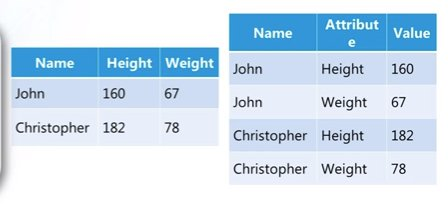

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [ ]:
# melt -> simple example branch
# wide to long


In [ ]:
# melt -> branch with year


In [ ]:
# melt -> real world example


### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# aggfunc


In [ ]:
# all cols together


In [ ]:
# multidimensional


In [ ]:
# margins


In [ ]:
# plotting graphs
